<a href="https://colab.research.google.com/github/CamyllaTahara/Claustering_Classification_ML/blob/main/Classifica%C3%A7%C3%A3o_Clausteriza%C3%A7%C3%A3o_Camylla_Luiz_6A_Matutino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Criação do Dataset Simulado

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np

# Definindo o número de alunos
n_students = 2000

# Criação das variáveis com distribuição aleatória
data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),  # Presença média em percentual
    "Assignments_Completed": np.random.randint(0, 20, n_students),  # Tarefas entregues
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),  # Horas de estudo semanais
    "Previous_Test_Score": np.random.normal(70, 15, n_students),  # Nota de prova anterior em percentual
    "Forum_Participation": np.random.normal(30, 10, n_students),  # Participação em fóruns
    "Age": np.random.randint(18, 35, n_students),  # Idade dos alunos
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students),  # Status socioeconômico
}

# Conversão para DataFrame
df = pd.DataFrame(data)

# Lógica para atribuir o nível de risco de desempenho
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 50),
    (df["Attendance"] >= 70) & (df["Attendance"] < 85) & (df["Study_Hours_Per_Week"] >= 10) & (df["Previous_Test_Score"] >= 50),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 60)
]

# Níveis de risco baseados nas condições definidas
risk_levels = ["Alto Risco", "Médio Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")

# Visualização dos primeiros registros
df.head()


,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,69.182768,12,17.651565,67.498515,40.394734,26,Low,Médio Risco
1,2,90.870887,18,18.557121,50.822324,34.104212,30,Low,Médio Risco
2,3,88.686704,19,16.957803,96.605275,21.838600,34,Medium,Baixo Risco
3,4,79.621809,4,14.286489,108.741553,26.446954,22,Medium,Médio Risco
4,5,93.304728,17,7.974103,55.978152,22.791957,33,Medium,Médio Risco


##Codificação Label Encoding

In [ ]:
#Codificar a variável Socioeconomic_Status, transformar em valor numérico
#Usar o label ecoding porque não temos uma ordem explícita

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Socioeconomic_Status'] = label_encoder.fit_transform(df['Socioeconomic_Status'])

df.head()




,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level,Cluster,Nível de Risco
0,1,69.389580,0.429689,17.686999,-0.172254,1.012652,-0.005618,1,Médio Risco,1,Baixo Risco
1,2,90.848865,1.454996,18.605465,-1.295178,0.380424,0.811496,1,Médio Risco,2,Baixo Risco
2,3,88.687727,1.625881,16.983345,1.787708,-0.852331,1.628610,2,Baixo Risco,2,Baixo Risco
3,4,79.718477,-0.937387,14.273945,2.604929,-0.389169,-0.822732,2,Médio Risco,3,Baixo Risco
4,5,93.257026,1.284112,7.871561,-0.948000,-0.756514,1.424332,2,Médio Risco,2,Baixo Risco


##Pré-Processamento dos Dados

In [ ]:
from sklearn.preprocessing import StandardScaler

#váriaveis que serão normalizadas, ou seja, todas as colunas que são variáveis NUMÉRICAS
numerical_columns = [
    'Attendance', #Percentual de presença nas aulas
    'Assignments_Completed',  #Número de tarefas entregues pelo aluno
    'Study_Hours_Per_Week', #Horas de estudos semanais do aluno
    'Previous_Test_Score', #Nota obtida pelo aluno na avaliação anterior
    'Forum_Participation', #Número de interações realizadas pelo aluno em fóruns
    'Age'
]

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level,Cluster,Nível de Risco
0,1,-1.061042,0.429689,0.537400,-0.172254,1.012652,-0.005618,1,Médio Risco,1,Baixo Risco
1,2,1.084887,1.454996,0.721093,-1.295178,0.380424,0.811496,1,Médio Risco,2,Baixo Risco
2,3,0.868773,1.625881,0.396669,1.787708,-0.852331,1.628610,2,Baixo Risco,2,Baixo Risco
3,4,-0.028152,-0.937387,-0.145211,2.604929,-0.389169,-0.822732,2,Médio Risco,3,Baixo Risco
4,5,1.325703,1.284112,-1.425688,-0.948000,-0.756514,1.424332,2,Médio Risco,2,Baixo Risco


##Utilizando Elbow Method para a escolha dos grupos

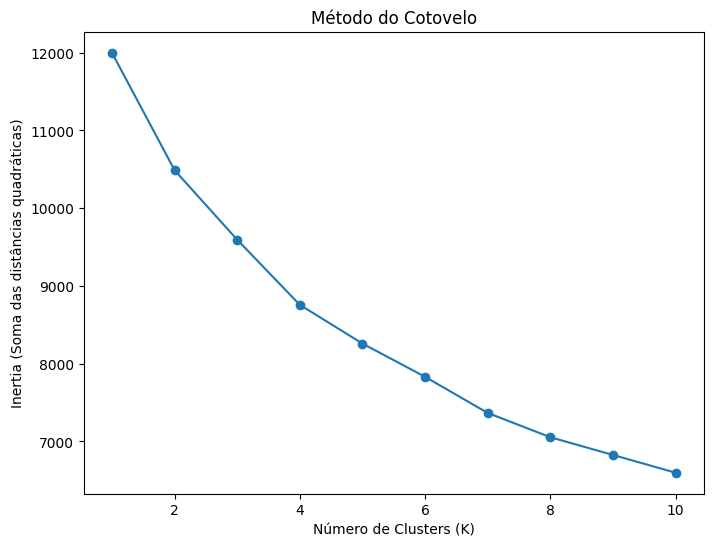

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definição das colunas numéricas que foram normalizadas
numerical_cols = ['Attendance', 'Assignments_Completed', 'Study_Hours_Per_Week', 'Previous_Test_Score', 'Forum_Participation', 'Age']

# Número máximo de clausters
max_k = 10
inertia_values = []

# loop para testar vários valores para k
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])  # Usando as variáveis numéricas normalizadas
    inertia_values.append(kmeans.inertia_)

# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertia_values, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inertia (Soma das distâncias quadráticas)")
plt.show()



##Aplicação do K-means

In [ ]:
from sklearn.cluster import KMeans

# Variáveis para a formação dos grupos
features = df[['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Previous_Test_Score']]

# Aplicar o KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features)

# Rótulos dos clusters
df['Cluster'] = kmeans.labels_

# Calcular a média das colunas numéricas para cada cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

print(cluster_summary)




          Student_ID  Attendance  Assignments_Completed  Study_Hours_Per_Week  \
Cluster                                                                         
0         988.628998    0.222431               0.868742              0.627414   
1         982.953668    0.900205              -0.654669              0.139805   
2        1023.843564   -0.509225               0.717655             -0.563403   
3        1006.145669   -0.617062              -0.847908             -0.161728   

         Previous_Test_Score  Forum_Participation       Age  \
Cluster                                                       
0                   0.622353            -0.005539  0.038810   
1                  -0.510222             0.069450  0.035396   
2                  -0.650200             0.001762 -0.054968   
3                   0.592052            -0.067455 -0.017279   

         Socioeconomic_Status  
Cluster                        
0                    1.059701  
1                    0.998069  
2     

##Gráfico 3D

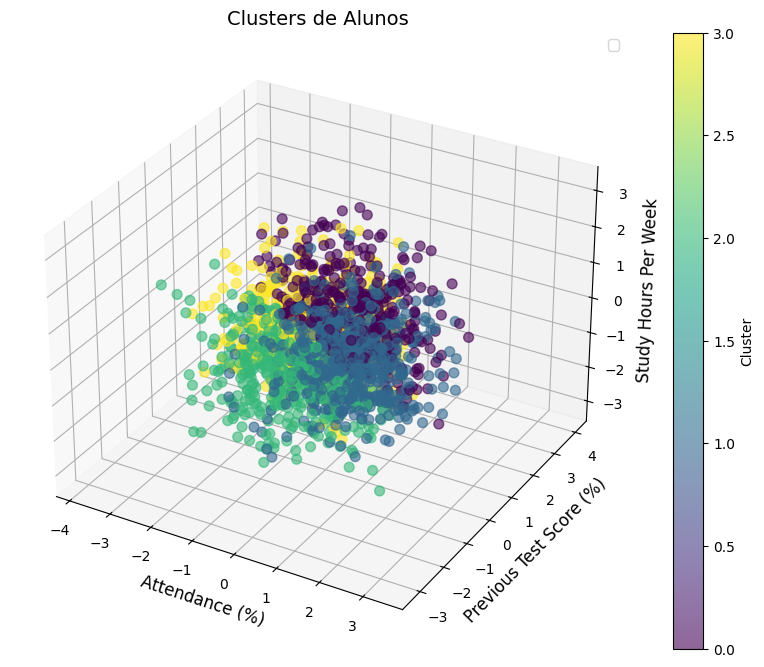

In [ ]:
from mpl_toolkits.mplot3d import Axes3D




# Seleção das colunas para o gráfico
x = df['Attendance']  # Presença
y = df['Previous_Test_Score']  # Nota anterior
z = df['Study_Hours_Per_Week']  # Horas de estudo semanal
clusters = df['Cluster']  # Cluster atribuído pelo K-means

# Obtendo os centroides
centroids = kmeans.cluster_centers_

# Criar o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos dos clusters
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', s=50, alpha=0.6)

# Adicionar rótulos e título
ax.set_title('Clusters de Alunos', fontsize=14)
ax.set_xlabel('Attendance (%)', fontsize=12)
ax.set_ylabel('Previous Test Score (%)', fontsize=12)
ax.set_zlabel('Study Hours Per Week', fontsize=12)

# Adicionar legenda
ax.legend()

# Adicionar barra de cores
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()



##Gráfico de Dispersão

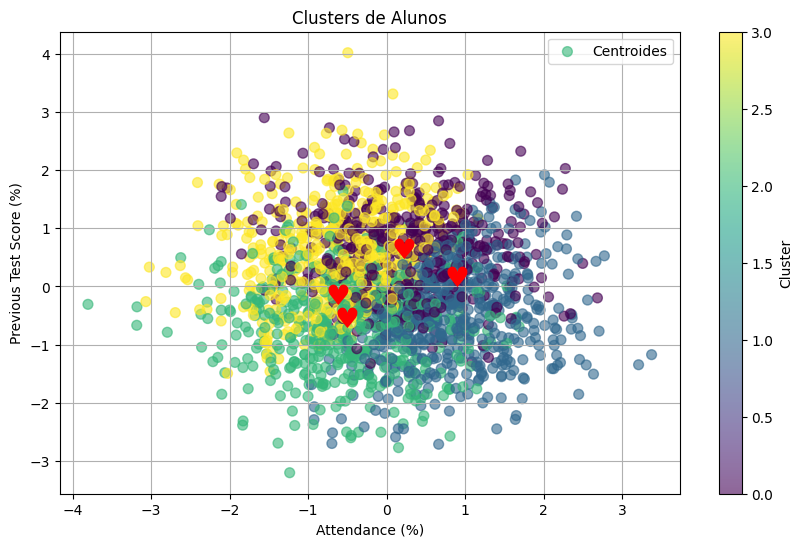

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Variáveis para a formação dos grupos
features = df[['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Previous_Test_Score']]

# Inicializar o KMeans com n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=42)
# Treinando aqui porque o modelo não estava encontrando os centroides.
kmeans.fit(features)

# coluna 'Cluster's
df['Cluster'] = kmeans.labels_

x = df['Attendance']  # Presença
y = df['Previous_Test_Score']  # Nota anterior
clusters = df['Cluster']  # Cluster atribuído pelo K-means

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=clusters, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')  s
plt.title('Clusters de Alunos')
plt.xlabel('Attendance (%)')
plt.ylabel('Previous Test Score (%)')

centroids = kmeans.cluster_centers_  # Acessar os centroides após o modelo ser treinado

for i in range(len(centroids)):
    plt.text(centroids[i, 0], centroids[i, 1], '\u2665', color='red', fontsize=20, ha='center', va='center')

# Adicionando legenda
plt.legend(['Centroides'], loc='upper right')

plt.grid(True)
plt.show()




##Rótulos de Risco

In [ ]:
# Pedi ajuda para o ChatGPT para me ajudar a montar o raciocínio, ajustei os valores das condicionais.
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

# Definindo os critérios de risco com base nas características médias de cada cluster
def atribuir_risco(row):
    if row['Attendance'] < 30 and row['Study_Hours_Per_Week'] < 2:
        return 'Alto Risco'  # Alta chance de baixo desempenho
    elif row['Attendance'] >= 40 and row['Attendance'] < 70 and row['Study_Hours_Per_Week'] >= 5 and row['Study_Hours_Per_Week'] < 10:
        return 'Médio Risco'  # Possível risco, dependendo do esforço do aluno
    else:
        return 'Baixo Risco'  # Alunos com boas condições

df['Nível de Risco'] = df.apply(atribuir_risco, axis=1)

# Visualizando o resultado
print(df[['Attendance', 'Study_Hours_Per_Week', 'Previous_Test_Score', 'Cluster', 'Nível de Risco']].head())



   Attendance  Study_Hours_Per_Week  Previous_Test_Score  Cluster  \
0   -1.061042              0.537400            -0.172254        2   
1    1.084887              0.721093            -1.295178        0   
2    0.868773              0.396669             1.787708        0   
3   -0.028152             -0.145211             2.604929        3   
4    1.325703             -1.425688            -0.948000        2   

  Nível de Risco  
0     Alto Risco  
1     Alto Risco  
2     Alto Risco  
3     Alto Risco  
4     Alto Risco  


##Random Forest

##Divisão do Modelo

In [ ]:
# Importação das bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X = df[['Attendance', 'Study_Hours_Per_Week', 'Assignments_Completed', 'Forum_Participation', 'Age']]  # Features
y = df['Risk_Level']  # Target

y = y.map({'Alto Risco': 0, 'Médio Risco': 1, 'Baixo Risco': 2})

# Dividindo o dataset em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##Nível de Risco

In [ ]:
# Agora que o modelo está treinando, realizamos as previsões
y_pred = rf.predict(X_test)


##Calcular a acurácia

In [ ]:

acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo: {acuracia * 100:.2f}%')


Acurácia do Modelo: 95.75%


##Matriz de Confusão

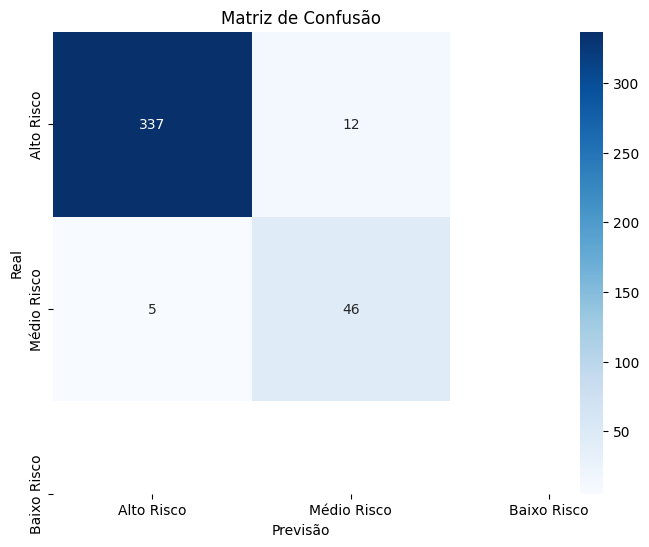

In [ ]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alto Risco', 'Médio Risco', 'Baixo Risco'], yticklabels=['Alto Risco', 'Médio Risco', 'Baixo Risco'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


##Features

In [ ]:
# Verificando a importância das variáveis
importancia = rf.feature_importances_
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importancia
}).sort_values(by='Importância', ascending=False)

print(importancia_df)


                 Feature  Importância
0             Attendance     0.473041
1   Study_Hours_Per_Week     0.334131
3    Forum_Participation     0.092298
2  Assignments_Completed     0.052499
4                    Age     0.048031


##Repostas

1)	O número de clusters foi escolhido de acordo com o método do cotovelo, o resultado do melhor número de cluster foi 4. As caracteristicas mais utiilizadas foram 'Attendance','Study_Hours_Per_Week', 'Previous_Test_Score','Assigments_Completed e 'Age'. O que se pode concluir, alunos que tem uma boa presença, participação, estudam durante a semana e tiraram boas notas no teste anterior, são classificados como alunos de baixo risco. O contrário estão na classificação de alunos de Alto Risco

2)As variáveis mais relevantes foram 'Attendance','Study_Hours_Per_Week','Forun_Participation','Assigments_Completed','Age'. Essas variáveis medem o desempenho do aluno, se ele está engajado nas aulas, se as notas estão boas. Todos esses pontos refletem para o resultado final.

3)O modelo teve uma boa precisão ao classifcar os alunos de risco. Fatores que podem influenciar nos resultados são, Dados incompletos, Classes desequilibradas. Para uma melhor precisão dos resultados podemos utilizar a validação cruzada, utlizar mais colunas e um dataframe com mais dados.